# Best Times to Tweets in Healthcare vs. Education

### Read in the csv file

In [1]:
import pandas as pd
df = pd.read_csv(r"E:\OneDrive - University of Georgia\Project\Data\tweet_data_2_food\4.3 FourColumns 3+1csv\fastFood_2021.csv",low_memory=False)
#df

### Convert the "Created At" field into a datetime data type, extract the day of the week, and map it onto a new column called "weekdays"

In [2]:
import datetime

df1 = df.copy()

df1['local_time'] = pd.to_datetime(df1['local_time'])
value = df1['local_time']
        
def weekday(date):
    if date.weekday() == 0:
        return 'Monday'
    elif date.weekday() == 1:
        return 'Tuesday'
    elif date.weekday() == 2:
        return 'Wednesday'
    elif date.weekday() == 3:
        return 'Thursday'
    elif date.weekday() == 4:
        return 'Friday'
    elif date.weekday() == 5:
        return 'Saturday'
    else:
        return 'Sunday'

df1["weekdays"] = value.map(weekday)
df1['weekdays']

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
290910    Wednesday
290911    Wednesday
290912    Wednesday
290913    Wednesday
290914    Wednesday
Name: weekdays, Length: 290915, dtype: object

### Extract the time and map it onto a new column called "time"

In [3]:
df2 = df1.copy()

def time(date):
    time2 = date.time()
    return time2

df2["time"] = value.map(time)
df2['time']

0         23:57:35
1         23:11:02
2         23:23:09
3         22:06:54
4         23:53:57
            ...   
290910    00:21:40
290911    00:13:43
290912    00:12:23
290913    00:11:10
290914    00:00:20
Name: time, Length: 290915, dtype: object

### Group the times into hourly buckets and map it onto a new column called "time groups"

In [4]:
df3 = df2.copy()

def time_groups(time):
    if time >= datetime.time(0,0) and time <= datetime.time(1,0):
        return '12AM-1AM'
    elif time >= datetime.time(1,0) and time <= datetime.time(2,0):
        return '1AM-2AM'
    elif time >= datetime.time(2,0) and time <= datetime.time(3,0):
        return '2AM-3AM'
    elif time >= datetime.time(3,0) and time <= datetime.time(4,0):
        return '3AM-4AM'
    elif time >= datetime.time(4,0) and time <= datetime.time(5,0):
        return '4AM-5AM'
    elif time >= datetime.time(5,0) and time <= datetime.time(6,0):
        return '5AM-6AM'
    elif time >= datetime.time(6,0) and time <= datetime.time(7,0):
        return '6AM-7AM'
    elif time >= datetime.time(7,0) and time <= datetime.time(8,0):
        return '7AM-8AM'
    elif time >= datetime.time(8,0) and time <= datetime.time(9,0):
        return '8AM-9AM'
    elif time >= datetime.time(9,0) and time <= datetime.time(10,0):
        return '9AM-10AM'
    elif time >= datetime.time(10,0) and time <= datetime.time(11,0):
        return '10AM-11AM'
    elif time >= datetime.time(11,0) and time <= datetime.time(12,0):
        return '11AM-12PM'
    elif time >= datetime.time(12,0) and time <= datetime.time(13,0):
        return '12PM-1PM'
    elif time >= datetime.time(13,0) and time <= datetime.time(14,0):
        return '1PM-2PM'
    elif time >= datetime.time(14,0) and time <= datetime.time(15,0):
        return '2PM-3PM'
    elif time >= datetime.time(15,0) and time <= datetime.time(16,0):
        return '3PM-4PM'
    elif time >= datetime.time(16,0) and time <= datetime.time(17,0):
        return '4PM-5PM'
    elif time >= datetime.time(17,0) and time <= datetime.time(18,0):
        return '5PM-6PM'
    elif time >= datetime.time(18,0) and time <= datetime.time(19,0):
        return '6PM-7PM'
    elif time >= datetime.time(19,0) and time <= datetime.time(20,0):
        return '7PM-8PM'
    elif time >= datetime.time(20,0) and time <= datetime.time(21,0):
        return '8PM-9PM'
    elif time >= datetime.time(21,0) and time <= datetime.time(22,0):
        return '9PM-10PM'
    elif time >= datetime.time(22,0) and time <= datetime.time(23,0):
        return '10PM-11PM'
    elif time >= datetime.time(23,0) and time <= datetime.time(23,59):
        return '11PM-12AM'
    else:
        return 'other'

df3["time groups"] = df3['time'].map(time_groups)
df3

,text,lon,lat,local_time,weekdays,time,time groups
0,Everyone is posting about how @Starbucks is no...,-118.125196,34.583629,2022-01-19 23:57:35,Wednesday,23:57:35,11PM-12AM
1,"lmao the doctor told Sarah,\n""ma'am, this is a...",-118.411907,34.020789,2022-01-19 23:11:02,Wednesday,23:11:02,11PM-12AM
2,I was a fan.. then this.. @Wendys \n\nCome on ...,-111.880874,33.282450,2022-01-19 23:23:09,Wednesday,23:23:09,11PM-12AM
3,"N171WC, a Robinson R44, is circling over Irwin...",-117.966121,34.103563,2022-01-19 22:06:54,Wednesday,22:06:54,10PM-11PM
4,Since when basic meal at Chipotle cost $30 waaat!,-97.754724,30.323346,2022-01-19 23:53:57,Wednesday,23:53:57,11PM-12AM
...,...,...,...,...,...,...,...
290910,Subway Surfers was really that game.,-74.185292,41.318312,2021-01-20 00:21:40,Wednesday,00:21:40,12AM-1AM
290911,@AndrewIdeker @july_2929 @TigerrPaul @jimmykim...,-80.233328,25.782354,2021-01-20 00:13:43,Wednesday,00:13:43,12AM-1AM
290912,"I ask a simple question, if you tax the rich m...",-82.935915,42.509768,2021-01-20 00:12:23,Wednesday,00:12:23,12AM-1AM
290913,I want Wendy’s,-73.948775,40.655138,2021-01-20 00:11:10,Wednesday,00:11:10,12AM-1AM


### Get the value counts of "weekdays"

In [6]:
df3['weekdays'].value_counts()

Wednesday    46389
Thursday     46376
Friday       43225
Tuesday      42335
Monday       39751
Saturday     37926
Sunday       34913
Name: weekdays, dtype: int64

### Get the value counts of "time groups"

In [7]:
df3['time groups'].value_counts()

12PM-1PM     20045
1PM-2PM      18940
11AM-12PM    18793
10AM-11AM    18635
2PM-3PM      17754
9AM-10AM     16550
6PM-7PM      16541
3PM-4PM      16497
5PM-6PM      16398
7PM-8PM      16341
4PM-5PM      16090
8PM-9PM      15895
8AM-9AM      14555
9PM-10PM     14470
10PM-11PM    11877
7AM-8AM       9284
11PM-12AM     8870
12AM-1AM      5972
6AM-7AM       4793
1AM-2AM       3834
2AM-3AM       2548
5AM-6AM       2437
3AM-4AM       1981
4AM-5AM       1687
other          128
Name: time groups, dtype: int64

### Renamed "time groups" to "time_groups" for manipulation purposes later

In [8]:
df4 = df3.copy()
df5 = df4.rename(index=str, columns={"time groups": "time_groups"})
df5

,text,lon,lat,local_time,weekdays,time,time_groups
0,Everyone is posting about how @Starbucks is no...,-118.125196,34.583629,2022-01-19 23:57:35,Wednesday,23:57:35,11PM-12AM
1,"lmao the doctor told Sarah,\n""ma'am, this is a...",-118.411907,34.020789,2022-01-19 23:11:02,Wednesday,23:11:02,11PM-12AM
2,I was a fan.. then this.. @Wendys \n\nCome on ...,-111.880874,33.282450,2022-01-19 23:23:09,Wednesday,23:23:09,11PM-12AM
3,"N171WC, a Robinson R44, is circling over Irwin...",-117.966121,34.103563,2022-01-19 22:06:54,Wednesday,22:06:54,10PM-11PM
4,Since when basic meal at Chipotle cost $30 waaat!,-97.754724,30.323346,2022-01-19 23:53:57,Wednesday,23:53:57,11PM-12AM
...,...,...,...,...,...,...,...
290910,Subway Surfers was really that game.,-74.185292,41.318312,2021-01-20 00:21:40,Wednesday,00:21:40,12AM-1AM
290911,@AndrewIdeker @july_2929 @TigerrPaul @jimmykim...,-80.233328,25.782354,2021-01-20 00:13:43,Wednesday,00:13:43,12AM-1AM
290912,"I ask a simple question, if you tax the rich m...",-82.935915,42.509768,2021-01-20 00:12:23,Wednesday,00:12:23,12AM-1AM
290913,I want Wendy’s,-73.948775,40.655138,2021-01-20 00:11:10,Wednesday,00:11:10,12AM-1AM


### Define the efficiency scores for the heat map

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", 
                "Friday", "Saturday", "Sunday"]
time_frames = ["12AM-1AM", "1AM-2AM", "2AM-3AM", "3AM-4AM", "4AM-5AM", 
               "5AM-6AM", "6AM-7AM", "7AM-8AM", "8AM-9AM", "9AM-10AM",
               "10AM-11AM", "11AM-12PM", "12PM-1PM", "1PM-2PM", "2PM-3PM",
               "3PM-4PM", "4PM-5PM", "5PM-6PM", "6PM-7PM", "7PM-8PM",
               "8PM-9PM", "9PM-10PM", "10PM-11PM", "11PM-12AM"]


def hc_efficiency_score(df, day, times):
    array1 = []
    array2=[]
    instance_val = 0
    #for each of the time frames
    for time in times:
        #locate the day of the week and the specific time frame, pull the data
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays", "time_groups"]]
        #If there are no tweets in that time frame
        if m1["time_groups"].count() == 0:
            #instance_val = 0
            #lowest category
            sum1 = 0
        else:
            #Sum the retweets, replies, and favorites and divide by num of tweets
            instance_val =  m1["time_groups"].count()
            array2.append(instance_val)
            #1661.25 3715.75 7099.875 9230.5 10546.125 11289.75 11938.5 14181
            #putting the tweets into categorical buckets
            if  instance_val >=  quartile_15 and instance_val <quartile_16+1:
                sum1 = 16
            elif instance_val >= quartile_14 and instance_val < quartile_15:
                sum1 = 15
            elif  instance_val >=  quartile_13 and instance_val <quartile_14:
                sum1 = 14
            elif instance_val >= quartile_12 and instance_val < quartile_13:
                sum1 = 13
            elif instance_val >= quartile_11 and instance_val < quartile_12:
                sum1 = 12
            elif instance_val >= quartile_10 and instance_val < quartile_11:
                sum1 = 11
            elif instance_val >= quartile_9 and instance_val < quartile_10:
                sum1 = 10
            elif instance_val >=  quartile_8 and instance_val <quartile_9:
                sum1 = 9
            elif instance_val >= quartile_7 and instance_val <quartile_8:
                sum1 = 8
            elif instance_val >= quartile_6 and instance_val < quartile_7:
                sum1 = 7
            elif instance_val >= quartile_5 and instance_val < quartile_6:
                sum1 = 6
            elif instance_val >= quartile_4 and instance_val < quartile_5:
                sum1 = 5
            elif instance_val >= quartile_3 and instance_val < quartile_4:
                sum1 = 4
            elif instance_val >=  quartile_2 and instance_val <quartile_3:
                sum1 = 3
            elif instance_val >= quartile_1 and instance_val <quartile_2:
                sum1 = 2
            else:
                sum1 = 1
        
        array1.append(sum1)
        
    print(array2)
    return array1

### Heat map for Tweets

[708, 452, 314, 236, 212, 330, 524, 1153, 1856, 2085, 2413, 2525, 2834, 2671, 2452, 2314, 2254, 2296, 2375, 2331, 2281, 2206, 1678, 1229]
[843, 440, 284, 261, 211, 393, 767, 1521, 2185, 2317, 2572, 2739, 2940, 2649, 2591, 2349, 2348, 2452, 2520, 2475, 2326, 2191, 1732, 1210]
[811, 458, 308, 241, 206, 376, 812, 1563, 2482, 2690, 2990, 2925, 3211, 3071, 2728, 2638, 2609, 2656, 2634, 2709, 2591, 2359, 1917, 1386]
[857, 556, 343, 283, 260, 359, 807, 1681, 2489, 2720, 2809, 2957, 3257, 2996, 2866, 2634, 2594, 2604, 2628, 2547, 2533, 2271, 1946, 1358]
[922, 577, 354, 305, 282, 413, 892, 1655, 2510, 2664, 2786, 2747, 2873, 2740, 2600, 2428, 2364, 2355, 2385, 2273, 2189, 1911, 1675, 1311]
[933, 668, 469, 308, 261, 292, 575, 957, 1701, 2221, 2764, 2580, 2646, 2523, 2417, 2138, 2000, 2068, 1981, 1958, 1955, 1758, 1483, 1249]
[898, 683, 476, 347, 255, 274, 416, 754, 1332, 1853, 2301, 2320, 2284, 2290, 2100, 1996, 1921, 1967, 2018, 2048, 2020, 1774, 1446, 1127]
[[4, 3, 2, 1, 1, 2, 4, 5, 8, 9, 12, 

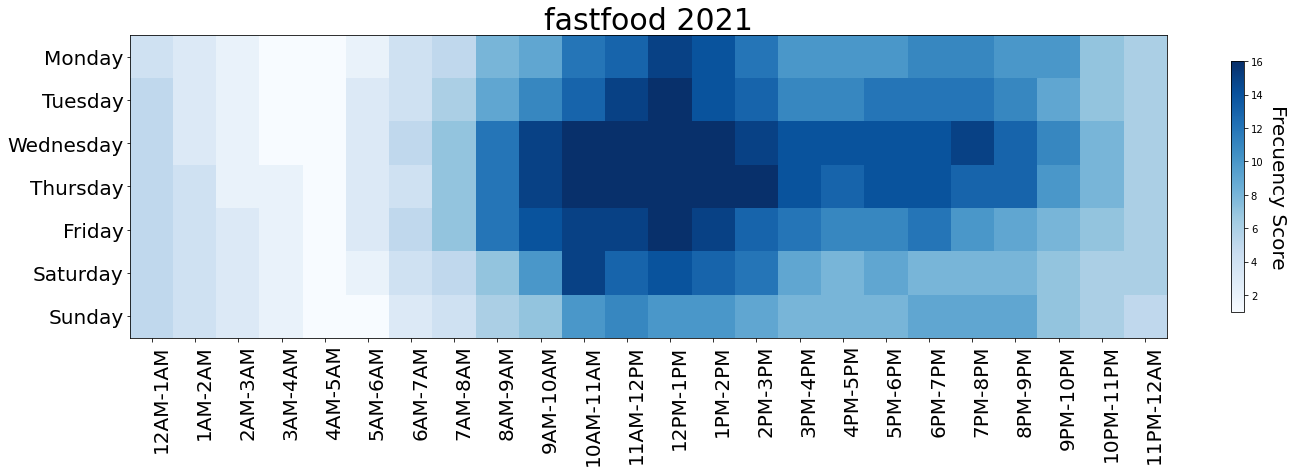

In [37]:
tweet_score = []

m_array = hc_efficiency_score(df5, "Monday", time_frames)
tweet_score.append(m_array)
t_array = hc_efficiency_score(df5, "Tuesday", time_frames)
tweet_score.append(t_array)
w_array = hc_efficiency_score(df5, "Wednesday", time_frames)
tweet_score.append(w_array)
th_array = hc_efficiency_score(df5, "Thursday", time_frames)
tweet_score.append(th_array)
f_array = hc_efficiency_score(df5, "Friday", time_frames)
tweet_score.append(f_array)
st_array = hc_efficiency_score(df5, "Saturday", time_frames)
tweet_score.append(st_array)
s_array = hc_efficiency_score(df5, "Sunday", time_frames)
tweet_score.append(s_array)
print(tweet_score)

tweet_score=[[4, 3, 2, 1, 1, 2, 4, 5, 8, 9, 12, 13, 15, 14, 12, 10, 10, 10, 11, 11, 10, 10, 7, 6], [5, 3, 2, 1, 1, 3, 4, 6, 9, 11, 13, 15, 16, 14, 13, 11, 11, 12, 12, 12, 11, 9, 7, 6], [5, 3, 2, 1, 1, 3, 5, 7, 12, 15, 16, 16, 16, 16, 15, 14, 14, 14, 14, 15, 13, 11, 8, 6], [5, 4, 2, 2, 1, 3, 4, 7, 12, 15, 16, 16, 16, 16, 16, 14, 13, 14, 14, 13, 13, 10, 8, 6], [5, 4, 3, 2, 1, 3, 5, 7, 12, 14, 15, 15, 16, 15, 13, 12, 11, 11, 12, 10, 9, 8, 7, 6], [5, 4, 3, 2, 1, 2, 4, 5, 7, 10, 15, 13, 14, 13, 12, 9, 8, 9, 8, 8, 8, 7, 6, 6], [5, 4, 3, 2, 1, 1, 3, 4, 6, 7, 10, 11, 10, 10, 9, 8, 8, 8, 9, 9, 9, 7, 6, 5]]

fig, ax = plt.subplots(figsize=(20,50))
#(figsize=(width,height))
im = ax.imshow(tweet_score, cmap = cm.Blues)

#get rid of grid lines
ax.grid(False)

#show all ticks...
ax.set_xticks(np.arange(len(time_frames)))
ax.set_yticks(np.arange(len(days_of_week)))
# ... and label them with the respective list entries
ax.set_xticklabels(time_frames, fontsize=20)
ax.set_yticklabels(days_of_week, fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

cbarlabel = "Frecuency Score"

cbar = ax.figure.colorbar(im, ax=ax,shrink=0.07)

cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize = 20)

ax.set_title("fastfood 2021", fontsize = 30)
fig.tight_layout()
#plt.show()
from PIL import Image
#plt.savefig("time_grid_2019.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

In [32]:
#quantile 
data=[708, 452, 314, 236, 212, 330, 524, 1153, 1856, 2085, 2413, 2525, 2834, 2671, 2452, 2314, 2254, 2296, 2375, 2331, 2281, 2206, 1678, 1229,843, 440, 284, 261, 211, 393, 767, 1521, 2185, 2317, 2572, 2739, 2940, 2649, 2591, 2349, 2348, 2452, 2520, 2475, 2326, 2191, 1732, 1210,811, 458, 308, 241, 206, 376, 812, 1563, 2482, 2690, 2990, 2925, 3211, 3071, 2728, 2638, 2609, 2656, 2634, 2709, 2591, 2359, 1917, 1386,857, 556, 343, 283, 260, 359, 807, 1681, 2489, 2720, 2809, 2957, 3257, 2996, 2866, 2634, 2594, 2604, 2628, 2547, 2533, 2271, 1946, 1358,922, 577, 354, 305, 282, 413, 892, 1655, 2510, 2664, 2786, 2747, 2873, 2740, 2600, 2428, 2364, 2355, 2385, 2273, 2189, 1911, 1675, 1311,933, 668, 469, 308, 261, 292, 575, 957, 1701, 2221, 2764, 2580, 2646, 2523, 2417, 2138, 2000, 2068, 1981, 1958, 1955, 1758, 1483, 1249,898, 683, 476, 347, 255, 274, 416, 754, 1332, 1853, 2301, 2320, 2284, 2290, 2100, 1996, 1921, 1967, 2018, 2048, 2020, 1774, 1446, 1127]
 
 
quartile_1 = np.quantile(data, 0.0625)
quartile_2 = np.quantile(data, 0.125)
quartile_3 = np.quantile(data, 0.1875)
quartile_4 = np.quantile(data, 0.25)
quartile_5 = np.quantile(data, 0.3125)
quartile_6 = np.quantile(data, 0.375)
quartile_7 = np.quantile(data, 0.4325)
quartile_8 = np.quantile(data, 0.5)
quartile_9 = np.quantile(data, 0.5625)
quartile_10 = np.quantile(data, 0.625)
quartile_11 = np.quantile(data, 0.6875)
quartile_12 = np.quantile(data, 0.75)
quartile_13 = np.quantile(data, 0.8125)
quartile_14 = np.quantile(data, 0.875)
quartile_15 = np.quantile(data, 0.9325)
quartile_16 = np.quantile(data, 1)

 
print(quartile_1,
      quartile_2,
      quartile_3,
      quartile_4,
      quartile_5,
      quartile_6,
      quartile_7,
      quartile_8,
      quartile_9,
      quartile_10,
      quartile_11,
      quartile_12,
      quartile_13,
      quartile_14,
      quartile_15,
      quartile_16)

282.4375 353.125 491.0 810.0 1163.6875 1547.25 1853.6825000000001 2009.0 2205.0625 2315.125 2383.125 2520.75 2602.75 2673.375 2802.7324999999996 3257


In [38]:
fig.savefig("time_grid_fastfood_2021.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

### How many tweets in each timeframe

In [ ]:
tweet_count = []

def tweets(df, day, times):
    array1 = []
    for time in times:
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays","time_groups"]]
        instance_val = m1["time_groups"].count()
        array1.append(instance_val)
    return array1

m_count = tweets(df5, "Monday", time_frames)
print("Monday: ", m_count)
tweet_count.append(m_count)
t_count = tweets(df5, "Tuesday", time_frames)
tweet_count.append(t_count)
print("Tuesday: ", t_count)
w_count = tweets(df5, "Wednesday", time_frames)
tweet_count.append(w_count)
print("Wednesday: ", w_count)
th_count = tweets(df5, "Thursday", time_frames)
tweet_count.append(th_count)
print("Thursday: ", th_count)
f_count = tweets(df5, "Friday", time_frames)
tweet_count.append(f_count)
print("Friday: ", f_count)
st_count = tweets(df5, "Saturday", time_frames)
tweet_count.append(st_count)
print("Saturday: ", st_count)
s_count = tweets(df5, "Sunday", time_frames)
tweet_count.append(s_count)
print("Sunday: ", s_count)